In [27]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


Open the data Files

In [28]:
cx_path = os.getcwd() + '/T_average_central/0/surfaceFieldValue.dat'
with open(cx_path,'r') as f0:
    cxSurf = np.array(f0.readlines())
    
out_path = os.getcwd() + '/T_average_outlet/0/surfaceFieldValue.dat'
with open(out_path,'r') as f1:
    outSurf = np.array(f1.readlines())

Determine the hased lines

In [5]:
def char_ll( data, c='#'):
    hashedLines = np.array([i for i, data in enumerate(data) if c in data])
    return hashedLines


Exclude hashed lines from data

In [14]:
cx_data = np.delete(cxSurf, char_ll(cxSurf))
out_data = np.delete(outSurf, char_ll(outSurf))

make data prettier

In [21]:
d_cx = np.array([[float(elem) for elem in item.split()] for item in cx_data])
d_out = np.array([[float(elem) for elem in item.split()] for item in out_data])
d0 = np.array([ 0, 0])
d_cx = np.vstack([ d0, d_cx[:,[0,2]]])
d_out = np.vstack([ d0, d_out[:,[0,2]]])

Print data in pyplot

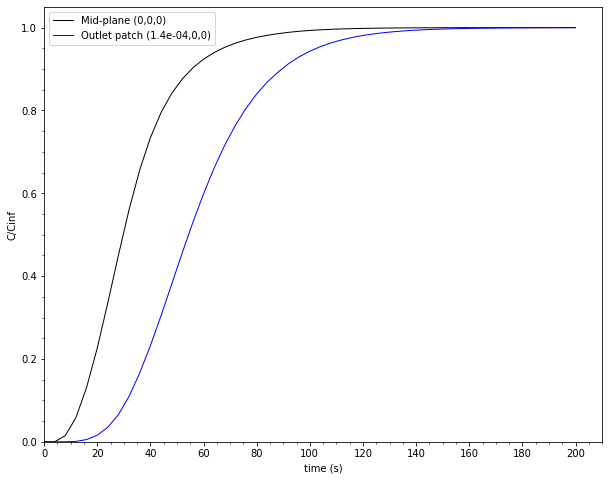

In [24]:
mpl.rcParams['figure.figsize'] = (10,8)
fig1, ax1 = plt.subplots()

line1, = ax1.plot(d_cx[:,0],d_cx[:,1], label='Mid-plane (0,0,0)', color='k', linewidth=1, linestyle='-', marker=None, fillstyle='none' )
# line2, = ax1.plot(d[:,0],d[:,2], label='probe Inlet', color='r', linewidth=0.5, linestyle='-', marker=None, fillstyle='none' )
line3, = ax1.plot(d_out[:,0],d_out[:,1], label='Outlet patch (1.4e-04,0,0)',color='b', linewidth=1, linestyle='-', marker=None, fillstyle='none' )

plt.xlabel('time (s)')
plt.xticks(np.arange(0,210,20))
ax1.yaxis.set_minor_locator(MultipleLocator(0.05))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
plt.xlim(left=0, right=210)
plt.ylim(bottom=0)
plt.ylabel('C/Cinf')
l = ax1.legend()